<a href="https://colab.research.google.com/github/neklyud/Samsung-NeuroNetwork-and-Computer-Visison/blob/master/gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

w = torch.tensor([[5.,10.],[1.,2.]], requires_grad=True)

function = torch.log(torch.log(w+7)).prod()
function.backward()
print(w)

tensor([[ 5., 10.],
        [ 1.,  2.]], requires_grad=True)


# Градиентный спуск для функции log(log(w+7)))


In [2]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -=  alpha*w.grad
    w.grad.zero_()
print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


In [4]:
import torch
w = torch.tensor([1.], requires_grad=True)
alpha = 0.
while(1):
    # it's critical to calculate function inside the loop:
    function = w**2
    function.backward()
    w.data -=  alpha*w.grad
    w.grad.zero_()
    alpha +=0.01
    if alpha == 10.:
      break
print(w)

KeyboardInterrupt: ignored

SineNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (acc1): Sigmoid()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)


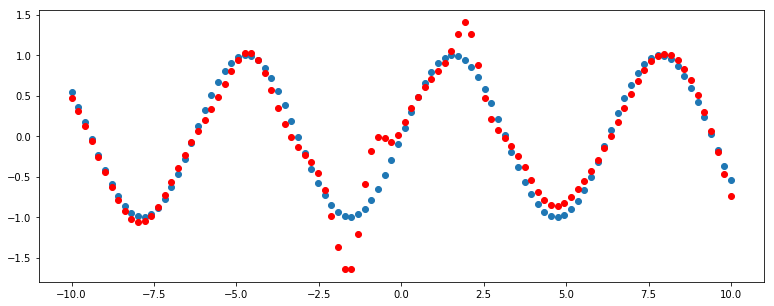

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (13.,5.)


import torch
x_train = torch.rand(100)
x_train = x_train*20. - 10.
y_train = torch.sin(x_train)

#plt.plot(x_train.numpy(), y_train.numpy(), 'o')
#plt.title('$y = sin(x)$')

noise = torch.randn(y_train.shape)/5
#plt.plot(x_train.numpy(), noise.numpy(), 'o')
#plt.axis([-10,10,-1,1])
#plt.title('Gaussian noise')

y_train = y_train + noise
#plt.plot(x_train.numpy(), y_train.numpy(), 'o')
#plt.axis([-10,10,-1,1])
#plt.title('y(x) with noise')


x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10,10,100)
y_validation = torch.sin(x_validation.data)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neuron):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neuron)
    self.acc1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neuron,1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.acc1(x)
    x = self.fc2(x)
    return x

def predict(net,x,y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o')
  plt.plot(x.numpy(), y_pred.data.numpy(),'o',c='r')
  plt.xlabel
  plt.ylabel
    
def loss(pred, target):
  squares = (pred-target)**2
  return squares.mean()
sine_net = SineNet(50)
print(sine_net)
#predict(sine_net, x_validation, y_validation)

optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)


for epoch_index in range(4650):
  optimizer.zero_grad()
  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)
  loss_val.backward()
  optimizer.step()
  
predict(sine_net, x_validation, y_validation)

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neuron):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neuron)
    self.acc1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neuron,1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.acc1(x)
    x = self.fc2(x)
    return x

def predict(net,x,y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o')
  plt.plot(x.numpy(), y_pred.data.numpy(),'o',c=r)
  plt.xlabel
  plt.ylabel
  
sine_net = SineNet(50)
print(sine_net)
predict(sine_net, x_validation, y_validation)

SineNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (acc1): Sigmoid()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)


NameError: ignored

0.022481320425868034


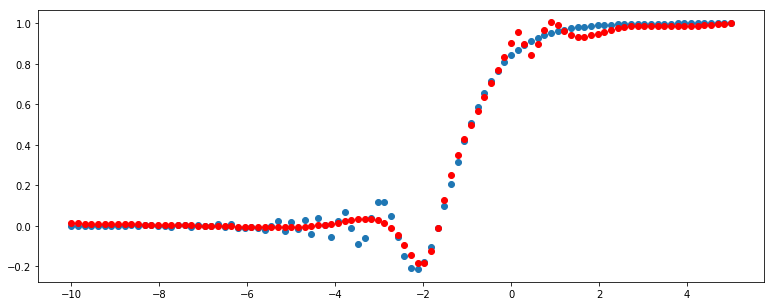

In [0]:
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (13.,5.)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(in_features = 1, out_features = 600)
      self.acc1 = torch.nn.Tanh()
      self.fc2 = torch.nn.Linear(in_features = 600, out_features = 1)
      
    def forward(self, x):
      x = self.fc1(x)
      x = self.acc1(x)
      x = self.fc2(x)
      return x

net = RegressionNet(600)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred-target)**2
    return squares.mean()
def predict(net,x,y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o')
  plt.plot(x.numpy(), y_pred.data.numpy(),'o',c='r')
  plt.xlabel
  plt.ylabel
  
for epoch_index in range(20000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()
    
predict(net, x_validation, y_validation)
print(metric(net.forward(x_validation), y_validation).item())